In [3]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/Noza23/myovision/blob/main/notebooks/02_exploratory_data_analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import statistics
import json

## Evaluating RGB

In [15]:
pixel_values = json.load(open('../assets/pixel_stats.json', 'r'))
lightness_values = json.load(open('../assets/lightness_stats.json', 'r'))

In [8]:
mean_activations = pixel_values['mean_activations']
stddev_activations = pixel_values['stddev_activations']

In [9]:
print(f'Minimum red value: {min(mean_activations[0])}, Maximum red value: {max(mean_activations[0])}, Minimum non-zero red value: {min(value for value in mean_activations[0] if value != 0)}')
print(f'Minimum green value: {min(mean_activations[1])}, Maximum green value: {max(mean_activations[1])}, Minimum non-zero green value: {min(value for value in mean_activations[1] if value != 0)}')
print(f'Minimum blue value: {min(mean_activations[2])}, Maximum blue value: {max(mean_activations[2])}, Minimum non-zero blue value: {min(value for value in mean_activations[2] if value != 0)}')

Minimum red value: 0.0, Maximum red value: 6.90134505907546, Minimum non-zero red value: 1.891012003539136
Minimum green value: 0.0, Maximum green value: 28.33597239308794, Minimum non-zero green value: 1.891012003539136
Minimum blue value: 0.0, Maximum blue value: 17.48500502777777, Minimum non-zero blue value: 2.8348777654320987


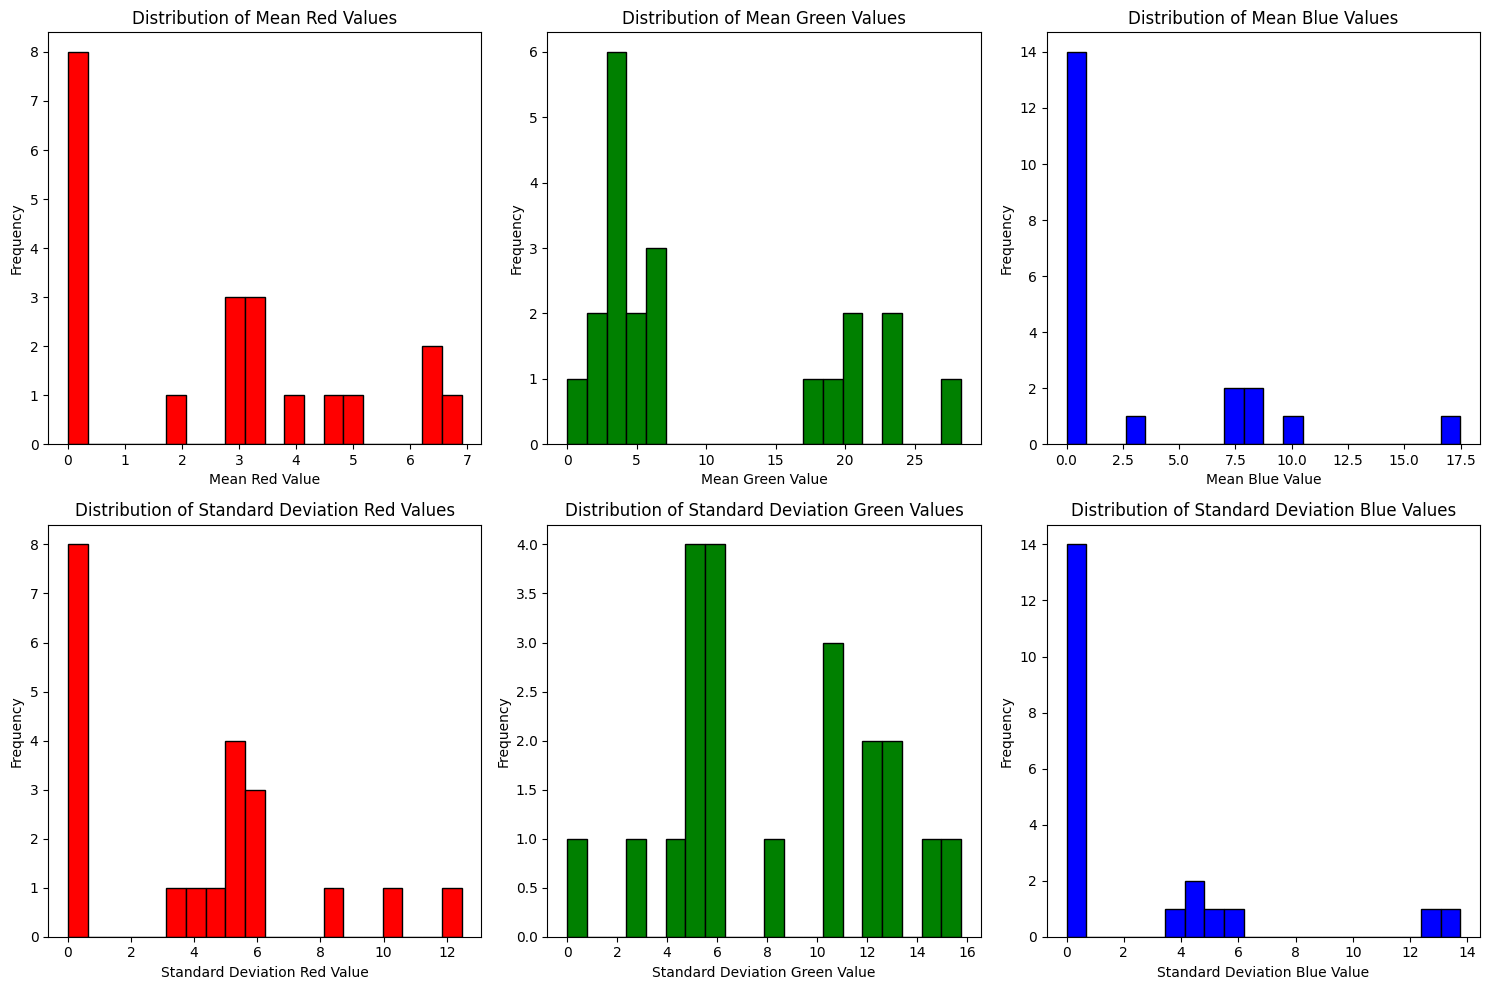

In [10]:
plt.figure(figsize=(15, 10))

# Histogram for Mean Red Values
plt.subplot(2, 3, 1)
plt.hist(mean_activations[0], bins=20, color='red', edgecolor='black')
plt.xlabel('Mean Red Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Red Values')

# Histogram for Mean Green Values
plt.subplot(2, 3, 2)
plt.hist(mean_activations[1], bins=20, color='green', edgecolor='black')
plt.xlabel('Mean Green Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Green Values')

# Histogram for Mean Blue Values
plt.subplot(2, 3, 3)
plt.hist(mean_activations[2], bins=20, color='blue', edgecolor='black')
plt.xlabel('Mean Blue Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Blue Values')

# Histogram for Standard Deviation Red Values
plt.subplot(2, 3, 4)
plt.hist(stddev_activations[0], bins=20, color='red', edgecolor='black')
plt.xlabel('Standard Deviation Red Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation Red Values')

# Histogram for Standard Deviation Green Values
plt.subplot(2, 3, 5)
plt.hist(stddev_activations[1], bins=20, color='green', edgecolor='black')
plt.xlabel('Standard Deviation Green Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation Green Values')

# Histogram for Standard Deviation Blue Values
plt.subplot(2, 3, 6)
plt.hist(stddev_activations[2], bins=20, color='blue', edgecolor='black')
plt.xlabel('Standard Deviation Blue Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation Blue Values')

plt.tight_layout()
plt.show()

In [11]:
mean_of_means = []
mean_of_stddevs = []

for channel in range(len(mean_activations)):
    mean_mean_channel = statistics.mean(mean_activations[channel])
    mean_std_dev_channel = statistics.mean(stddev_activations[channel])

    mean_of_means.append(mean_mean_channel)
    mean_of_stddevs.append(mean_std_dev_channel)

In [12]:
print(f'Mean mean red acitvations: {mean_of_means[0]}, Mean mean green activations: {mean_of_means[1]}, Mean mean blue preprocessed: {mean_of_means[2]}')
print(f'Mean std dev red activations: {mean_of_stddevs[0]}, Mean std dev green activations: {mean_of_stddevs[1]}, Mean std dev blue activations: {mean_of_stddevs[2]}')

Mean mean red acitvations: 2.5587570836575004, Mean mean green activations: 9.79406334751103, Mean mean blue preprocessed: 2.9005641239882025
Mean std dev red activations: 3.881452623246032, Mean std dev green activations: 8.138993452855999, Mean std dev blue activations: 2.3621462963844055


## Evaluating Lightness

In [20]:
means_l = lightness_values['means_l']
stddevs_l = lightness_values['stddevs_l']

In [25]:
print(f'Minimum lightness: {min(means_l)}, Maximum lightness: {max(means_l)}, Minimum non-zero lightness: {min(value for value in means_l if value != 0)}')

Minimum lightness: 0.6386935217929609, Maximum lightness: 14.22958410603493, Minimum non-zero lightness: 0.6386935217929609


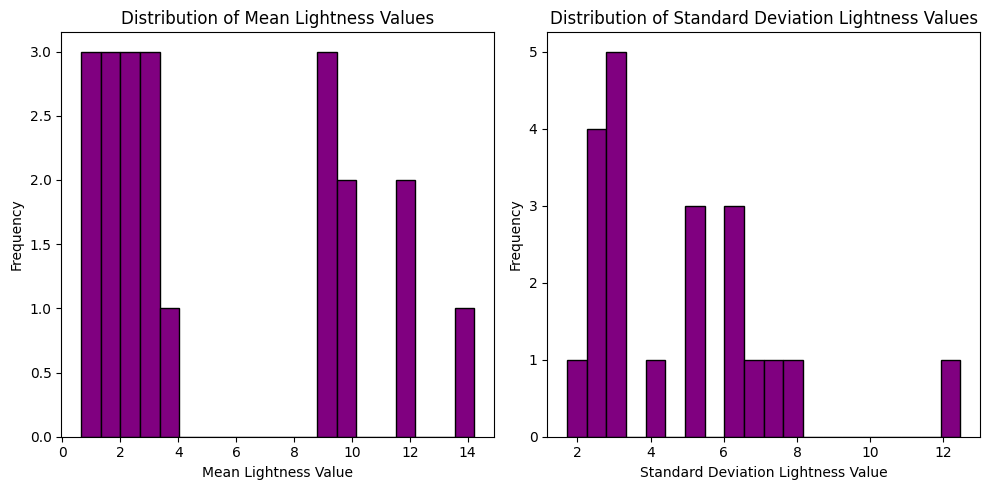

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(means_l, bins=20, color='purple', edgecolor='black')
plt.xlabel('Mean Lightness Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Lightness Values')

plt.subplot(1, 2, 2)
plt.hist(stddevs_l, bins=20, color='purple', edgecolor='black')
plt.xlabel('Standard Deviation Lightness Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation Lightness Values')

plt.tight_layout()

In [24]:
print(f'Mean mean lightness values: {statistics.mean(means_l)}, Mean std dev lightness values: {statistics.mean(stddevs_l)}')

Mean mean lightness values: 5.370716383270851, Mean std dev lightness values: 4.744897166493704
